## Import thư viện

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Đọc dữ liệu

In [210]:
df = pd.read_csv('/content/drive/MyDrive/data (1).csv')
df

,FileName,PdfSize,MetadataSize,Pages,XrefLength,TitleCharacters,isEncrypted,EmbeddedFiles,Images,Text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0.0,No,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,11.5,202.0,0.5,15.5,3.5,0.0,0.0,0.0,No,...,0.0,0.5,0.5,0.0,0.0,0.0,4.0,0.5,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,9.5,346.0,1.0,16.5,11.5,0.0,0.0,0.0,Yes,...,0.0,0.5,0.5,0.0,0.0,0.0,4.0,0.5,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,10.5,359.0,1.5,14.0,8.0,0.0,0.0,0.0,No,...,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,12.0,251.0,2.0,15.5,22.5,0.0,0.0,0.0,Yes,...,0.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10018,908f8e3411d1bdf5e0fa7ca953c85cc4f133729fd4c71a...,294.0,333.5,1.0,51.5,12.0,0.0,0.0,1.0,No,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
10019,72654b36f6a240d953a9ce3e898a4dfa381031ba7f5e2a...,301.0,305.0,1.0,51.5,5.5,0.0,0.0,1.0,unclear,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
10020,dad02289bc442e235961f4cf87cbde364a2250bdc57632...,38.5,345.5,1.5,14.5,7.0,0.0,0.0,-0.5,Yes,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious
10021,b219390e223ea263476d65277d00804cfd0a93023e1903...,21.0,357.5,1.5,100009.5,12.0,0.0,0.0,0.0,Yes,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious


## Xử lý dữ liệu

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FileName         10023 non-null  object 
 1   PdfSize          10023 non-null  float64
 2   MetadataSize     10023 non-null  float64
 3   Pages            10023 non-null  float64
 4   XrefLength       10023 non-null  float64
 5   TitleCharacters  10023 non-null  float64
 6   isEncrypted      10023 non-null  float64
 7   EmbeddedFiles    10023 non-null  float64
 8   Images           10023 non-null  float64
 9   Text             10023 non-null  object 
 10  Header           10023 non-null  float64
 11  Obj              10023 non-null  float64
 12  Endobj           10023 non-null  float64
 13  Stream           10023 non-null  float64
 14  Endstream        10023 non-null  float64
 15  Xref             10023 non-null  float64
 16  Trailer          10023 non-null  float64
 17  StartXref   

In [212]:
# Khởi tạo LabelEncoder
label_encoder_Text = LabelEncoder()

# Áp dụng LabelEncoder cho cột dữ liệu cần chuyển đổi
df['Text_num'] = label_encoder_Text.fit_transform(df['Text'])
df.head()

,FileName,PdfSize,MetadataSize,Pages,XrefLength,TitleCharacters,isEncrypted,EmbeddedFiles,Images,Text,...,OpenAction,Acroform,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors,Class,Text_num
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0.0,No,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious,2
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,11.5,202.0,0.5,15.5,3.5,0.0,0.0,0.0,No,...,0.5,0.5,0.0,0.0,0.0,4.0,0.5,0.0,Malicious,2
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,9.5,346.0,1.0,16.5,11.5,0.0,0.0,0.0,Yes,...,0.5,0.5,0.0,0.0,0.0,4.0,0.5,0.0,Malicious,3
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,10.5,359.0,1.5,14.0,8.0,0.0,0.0,0.0,No,...,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,Malicious,2
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,12.0,251.0,2.0,15.5,22.5,0.0,0.0,0.0,Yes,...,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,Malicious,3


In [213]:
# In ra từ điển giá trị gán cho nhãn
label_mapping_Text = dict(zip(label_encoder_Text.classes_, label_encoder_Text.transform(label_encoder_Text.classes_)))
print(label_mapping_Text)

{'-1': 0, '0': 1, 'No': 2, 'Yes': 3, 'unclear': 4}


In [214]:
# Khởi tạo LabelEncoder
label_encoder_Class = LabelEncoder()

# Áp dụng LabelEncoder cho cột dữ liệu cần chuyển đổi
df['Class'] = label_encoder_Class.fit_transform(df['Class'])
df.head()

,FileName,PdfSize,MetadataSize,Pages,XrefLength,TitleCharacters,isEncrypted,EmbeddedFiles,Images,Text,...,OpenAction,Acroform,JBIG2Decode,RichMedia,Launch,EmbeddedFile,XFA,Colors,Class,Text_num
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0.0,No,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,11.5,202.0,0.5,15.5,3.5,0.0,0.0,0.0,No,...,0.5,0.5,0.0,0.0,0.0,4.0,0.5,0.0,1,2
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,9.5,346.0,1.0,16.5,11.5,0.0,0.0,0.0,Yes,...,0.5,0.5,0.0,0.0,0.0,4.0,0.5,0.0,1,3
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,10.5,359.0,1.5,14.0,8.0,0.0,0.0,0.0,No,...,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1,2
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,12.0,251.0,2.0,15.5,22.5,0.0,0.0,0.0,Yes,...,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,1,3


In [215]:
# In ra từ điển giá trị gán cho nhãn
label_mapping_Class = dict(zip(label_encoder_Class.classes_, label_encoder_Class.transform(label_encoder_Class.classes_)))
label_mapping_Class

{'Benign': 0, 'Malicious': 1}

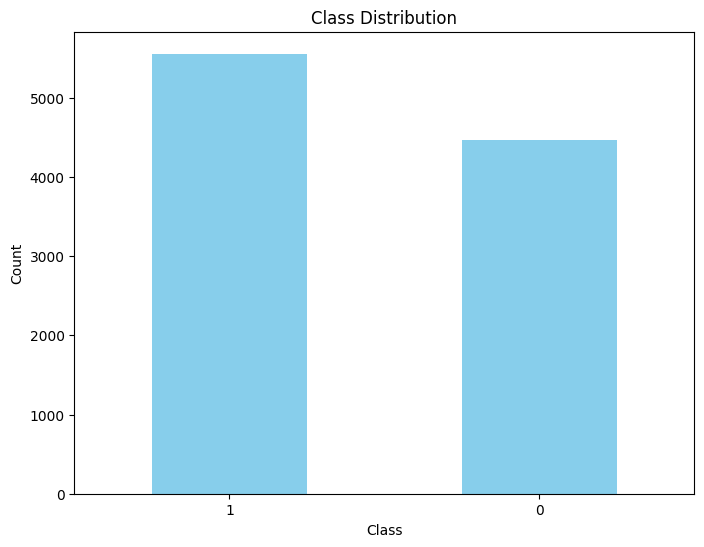

In [216]:
# Lấy số lượng mẫu của mỗi lớp
class_counts = df['Class'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=0)  # Xoay nhãn trục x nếu cần thiết
plt.show()


## Chia dữ liệu

In [217]:
# Số lượng mẫu trong tập dữ liệu
total_samples = len(df)  # Số lượng mẫu tổng cộng
training_ratio = 0.7
validation_ratio = 0.1
testing_ratio = 0.2

# Số lượng mẫu cho từng phần
num_training_samples = int(total_samples * training_ratio)
num_validation_samples = int(total_samples * validation_ratio)
num_testing_samples = int(total_samples * testing_ratio)

# Chia dữ liệu thành các phần
# Đầu tiên, chia dữ liệu thành tập huấn luyện và tập còn lại
df_train, df_remaining = train_test_split(df, train_size=training_ratio, random_state=42)

# Tiếp theo, chia tập còn lại thành tập xác thực và tập kiểm tra
df_valid, df_test = train_test_split(df_remaining, test_size=testing_ratio/(validation_ratio + testing_ratio), random_state=42)

# In số lượng mẫu trong từng phần
print("Số lượng mẫu cho huấn luyện:", len(df_train))
print("Số lượng mẫu cho xác thực:", len(df_valid))
print("Số lượng mẫu cho kiểm tra:", len(df_test))


Số lượng mẫu cho huấn luyện: 7016
Số lượng mẫu cho xác thực: 1002
Số lượng mẫu cho kiểm tra: 2005


## Định nghĩa biến sử dụng và chia biến độc lập - biến phụ thuộc

In [218]:
X_features = df.columns.drop(['FileName', 'Text', 'Class'])
y_feature = ['Class']
print("Biến độc lập: ")
print(X_features)
print("*"*30)
print("Biến phụ thuộc: ")
print(y_feature)

Biến độc lập: 
Index(['PdfSize', 'MetadataSize', 'Pages', 'XrefLength', 'TitleCharacters',
       'isEncrypted', 'EmbeddedFiles', 'Images', 'Header', 'Obj', 'Endobj',
       'Stream', 'Endstream', 'Xref', 'Trailer', 'StartXref', 'PageNo',
       'Encrypt', 'ObjStm', 'JS', 'Javascript', 'AA', 'OpenAction', 'Acroform',
       'JBIG2Decode', 'RichMedia', 'Launch', 'EmbeddedFile', 'XFA', 'Colors',
       'Text_num'],
      dtype='object')
******************************
Biến phụ thuộc: 
['Class']


In [233]:
X, y = df[X_features], df[y_feature]
X_train, y_train = df_train[X_features], df_train[y_feature]
X_test, y_test = df_test[X_features], df_test[y_feature]
X_val, y_val = df_valid[X_features], df_valid[y_feature]

## Huấn luyện mô hình chưa áp dụng Adaboost


In [237]:
from sklearn.tree import DecisionTreeClassifier

# Tạo một bộ phân loại cây quyết định
decision_tree = DecisionTreeClassifier(max_depth=3)

# Huấn luyện mô hình trên tập huấn luyện
decision_tree.fit(X_train, y_train)



# Đánh giá độ chính xác trên tập kiểm tra
test_accuracy1 = decision_tree.score(X_test, y_test)
print("Độ chính xác trên tập kiểm tra:", test_accuracy)


Độ chính xác trên tập kiểm tra: 0.9645885286783042


## Huấn luyện mô hình

In [238]:
# Tạo một bộ phân loại cây quyết định để sử dụng trong thuật toán AdaBoost
base_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=6704)

# Thiết lập các tham số tối ưu cho AdaBoost
param_dist = {
    'base_estimator': [base_tree],
    'n_estimators': [10, 20, 30, 40, 50],  # Sử dụng danh sách giá trị cho số lượng cây quyết định
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
}

# Khởi tạo mô hình AdaBoost
adaboost_clf = AdaBoostClassifier()

# Thực hiện tìm kiếm ngẫu nhiên trên lưới siêu tham số
random_search = RandomizedSearchCV(adaboost_clf, param_distributions=param_dist, n_iter=30, random_state=42)

# Huấn luyện mô hình trên dữ liệu huấn luyện
random_search.fit(X_train, y_train)

# In ra các tham số tốt nhất
print("Các tham số tốt nhất:", random_search.best_params_)

# Đánh giá mô hình trên tập dữ liệu kiểm tra (hoặc xác thực)
accuracy = random_search.score(X_val, y_val)
print("Độ chính xác trên tập kiểm tra:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 25 is smaller than n_iter=30. Running 25 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/

Các tham số tốt nhất: {'n_estimators': 40, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=6704)}
Độ chính xác trên tập kiểm tra: 0.9900199600798403


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Lựa chọn mô hình tốt nhất sau khi đã fine tune

In [239]:
# Xây dựng một bộ phân loại cây quyết định với các tham số tốt nhất
best_tree = DecisionTreeClassifier(max_depth=6704)

# Xây dựng mô hình AdaBoost với các tham số tốt nhất và bộ phân loại cây quyết định đã chọn
final_model = AdaBoostClassifier(base_estimator=best_tree, n_estimators=40, learning_rate=0.1)

# Huấn luyện mô hình cuối cùng trên toàn bộ dữ liệu
final_model.fit(X_train, y_train)

# Đánh giá độ chính xác trên tập huấn luyện
train_accuracy = final_model.score(X_train, y_train)
print("Độ chính xác trên tập huấn luyện:", train_accuracy)

# Đánh giá độ chính xác trên tập xác thực
val_accuracy = final_model.score(X_val, y_val)
print("Độ chính xác trên tập xác thực:", val_accuracy)

# Đánh giá độ chính xác trên tập kiểm tra
test_accuracy = final_model.score(X_test, y_test)
print("Độ chính xác trên tập kiểm tra:", test_accuracy)

Độ chính xác trên tập huấn luyện: 1.0
Độ chính xác trên tập xác thực: 0.9900199600798403
Độ chính xác trên tập kiểm tra: 0.9905236907730673


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## Đánh giá mô hình trên tập Test

Đánh giá mô hình:
Điểm cross-validation: 0.9639398074537062
Độ chính xác trên tập kiểm tra: 0.9645885286783042
Precision trên tập kiểm tra: 0.984573502722323
Recall trên tập kiểm tra: 0.9525899912203687
f1 trên tập kiểm tra: 0.9683177153056671


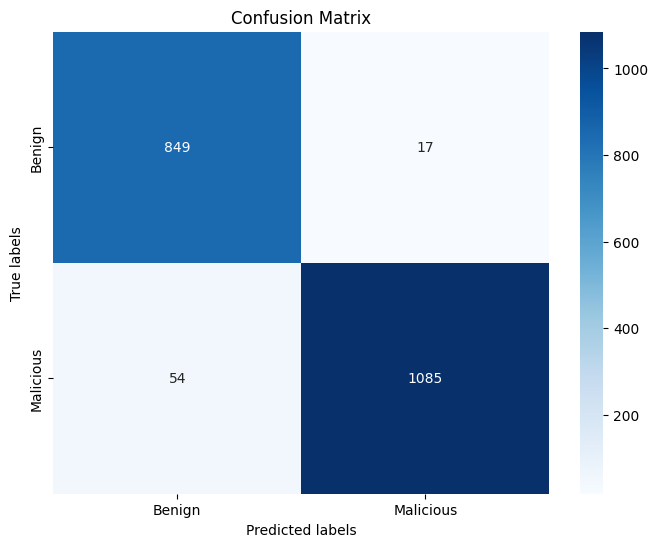

In [247]:
# 1. Kiểm thử mô hình bằng cross-validation 5-fold
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)

# 2. Đánh giá hiệu suất của mô hình trên tập dữ liệu kiểm thử
test_predictions = decision_tree.predict(X_test)

# 3. Sử dụng các chỉ số đánh giá tiêu chuẩn để đánh giá hiệu quả của mô hình
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)

# In kết quả
print("Đánh giá mô hình:")
print("Điểm cross-validation:", cv_scores.mean())
print("Độ chính xác trên tập kiểm tra:", accuracy)
print("Precision trên tập kiểm tra:", precision)
print("Recall trên tập kiểm tra:", recall)
print("f1 trên tập kiểm tra:", f1)
# Vẽ ma trận nhầm lẫn bằng seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [243]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_val, y_val, X_test, y_test are already defined

# Khởi tạo và huấn luyện mô hình
best_tree = DecisionTreeClassifier(max_depth=6704)
final_model = AdaBoostClassifier(base_estimator=best_tree, n_estimators=40, learning_rate=0.1)
final_model.fit(X_train, y_train)

# Lặp qua việc huấn luyện và đánh giá mô hình 30 lần
train_accuracies = []
val_accuracies = []
test_accuracies = []

for i in range(30):
    final_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6704),
                                      n_estimators=40, learning_rate=0.1)
    final_model.fit(X_train, y_train)

    train_acc = final_model.score(X_train, y_train)
    val_acc = final_model.score(X_val, y_val)
    test_acc = final_model.score(X_test, y_test)

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)

    # In ra độ chính xác sau mỗi lần lặp
    print(f"Iteration {i+1}:")
    print(f"Training Accuracy: {train_acc}")
    print(f"Validation Accuracy: {val_acc}")
    print(f"Test Accuracy: {test_acc}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Iteration 1:
Training Accuracy: 1.0
Validation Accuracy: 0.9900199600798403
Test Accuracy: 0.9895261845386534

Iteration 2:
Training Accuracy: 1.0
Validation Accuracy: 0.9890219560878244
Test Accuracy: 0.9890274314214463



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Iteration 3:
Training Accuracy: 1.0
Validation Accuracy: 0.9900199600798403
Test Accuracy: 0.9905236907730673

Iteration 4:
Training Accuracy: 1.0
Validation Accuracy: 0.9880239520958084
Test Accuracy: 0.9895261845386534



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Iteration 5:
Training Accuracy: 1.0
Validation Accuracy: 0.9910179640718563
Test Accuracy: 0.9900249376558603

Iteration 6:
Training Accuracy: 1.0
Validation Accuracy: 0.9870259481037924
Test Accuracy: 0.9910224438902743



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Iteration 7:
Training Accuracy: 1.0
Validation Accuracy: 0.9890219560878244
Test Accuracy: 0.9895261845386534

Iteration 8:
Training Accuracy: 1.0
Validation Accuracy: 0.9870259481037924
Test Accuracy: 0.9900249376558603



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Iteration 9:
Training Accuracy: 1.0
Validation Accuracy: 0.9880239520958084
Test Accuracy: 0.9890274314214463

Iteration 10:
Training Accuracy: 1.0
Validation Accuracy: 0.9890219560878244
Test Accuracy: 0.9895261845386534



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Iteration 11:
Training Accuracy: 1.0
Validation Accuracy: 0.9890219560878244
Test Accuracy: 0.9900249376558603

Iteration 12:
Training Accuracy: 1.0
Validation Accuracy: 0.9870259481037924
Test Accuracy: 0.9880299251870324



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Iteration 13:
Training Accuracy: 1.0
Validation Accuracy: 0.9910179640718563
Test Accuracy: 0.9910224438902743

Iteration 14:
Training Accuracy: 1.0
Validation Accuracy: 0.9880239520958084
Test Accuracy: 0.9895261845386534



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Iteration 15:
Training Accuracy: 1.0
Validation Accuracy: 0.9900199600798403
Test Accuracy: 0.9905236907730673

Iteration 16:
Training Accuracy: 1.0
Validation Accuracy: 0.9900199600798403
Test Accuracy: 0.9895261845386534



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Iteration 17:
Training Accuracy: 1.0
Validation Accuracy: 0.9890219560878244
Test Accuracy: 0.9885286783042394

Iteration 18:
Training Accuracy: 1.0
Validation Accuracy: 0.9900199600798403
Test Accuracy: 0.9880299251870324



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Iteration 19:
Training Accuracy: 1.0
Validation Accuracy: 0.9910179640718563
Test Accuracy: 0.9905236907730673

Iteration 20:
Training Accuracy: 1.0
Validation Accuracy: 0.9910179640718563
Test Accuracy: 0.9895261845386534



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Iteration 21:
Training Accuracy: 1.0
Validation Accuracy: 0.9890219560878244
Test Accuracy: 0.9905236907730673

Iteration 22:
Training Accuracy: 1.0
Validation Accuracy: 0.9890219560878244
Test Accuracy: 0.9920199501246882



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Iteration 23:
Training Accuracy: 1.0
Validation Accuracy: 0.9880239520958084
Test Accuracy: 0.9905236907730673

Iteration 24:
Training Accuracy: 1.0
Validation Accuracy: 0.9890219560878244
Test Accuracy: 0.9895261845386534

Iteration 25:
Training Accuracy: 1.0
Validation Accuracy: 0.9900199600798403
Test Accuracy: 0.9905236907730673



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarnin

Iteration 26:
Training Accuracy: 1.0
Validation Accuracy: 0.9900199600798403
Test Accuracy: 0.9900249376558603

Iteration 27:
Training Accuracy: 1.0
Validation Accuracy: 0.9870259481037924
Test Accuracy: 0.9890274314214463

Iteration 28:
Training Accuracy: 1.0
Validation Accuracy: 0.9900199600798403
Test Accuracy: 0.9905236907730673



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarnin

Iteration 29:
Training Accuracy: 1.0
Validation Accuracy: 0.9910179640718563
Test Accuracy: 0.9920199501246882

Iteration 30:
Training Accuracy: 1.0
Validation Accuracy: 0.9880239520958084
Test Accuracy: 0.9905236907730673



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [244]:
# Tìm index của độ chính xác lớn nhất trên tập kiểm tra
max_test_accuracy_index = np.argmax(test_accuracies)
max_test_accuracy_iteration = max_test_accuracy_index + 1  # Vì index bắt đầu từ 0

# In ra độ chính xác cao nhất trên tập kiểm tra và tương ứng với iteration
print(f"Max Test Accuracy: {test_accuracies[max_test_accuracy_index]}")
print(f"Iteration with Max Test Accuracy: {max_test_accuracy_iteration}")


Max Test Accuracy: 0.9920199501246882
Iteration with Max Test Accuracy: 22


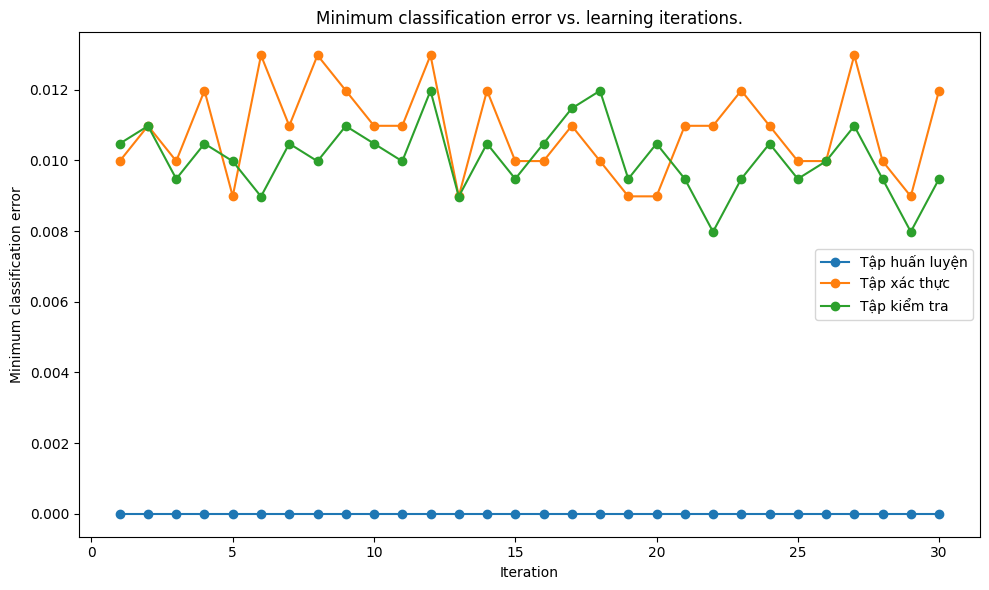

In [245]:
# Để thể hiện 1-accuracy, chúng ta sẽ tính sai số (1 - độ chính xác) cho từng tập dữ liệu

# Tính sai số
train_errors = [1 - acc for acc in train_accuracies]
val_errors = [1 - acc for acc in val_accuracies]
test_errors = [1 - acc for acc in test_accuracies]

# Vẽ biểu đồ cột cho sai số
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_errors,'o-', label='Tập huấn luyện')
plt.plot(iterations, val_errors,'o-', label='Tập xác thực')
plt.plot(iterations, test_errors,'o-', label='Tập kiểm tra')
plt.xlabel('Iteration')
plt.ylabel('Minimum classification error')
plt.title('Minimum classification error vs. learning iterations.')
plt.legend()
plt.tight_layout()
plt.show()


## Vẽ ma trận nhầm lẫn trên toàn tập dữ liệu

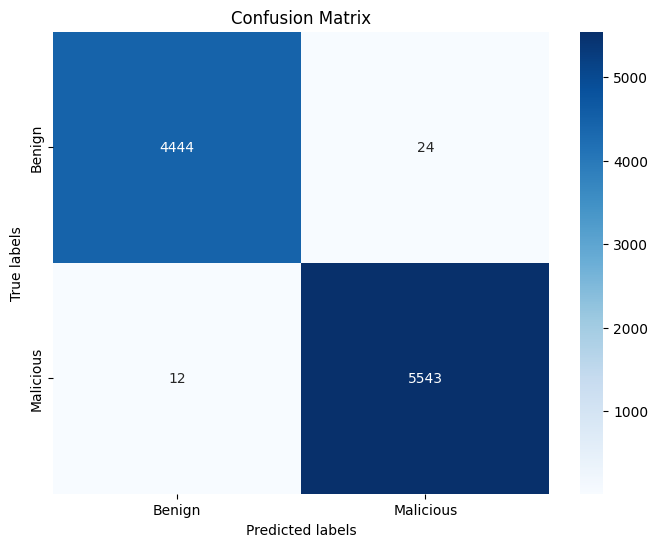

In [ ]:
predictions = final_model.predict(X)

conf_matrix_all = confusion_matrix(y, predictions)

# Vẽ ma trận nhầm lẫn bằng seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_all, annot=True, cmap="Blues", fmt="d", xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()